In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle

from utils.data_loader import load_data
from models.fit_LN_model import fit_all_LN_models
from models.model_selection import model_selection
from utils.tuning_curves import compute_all_tuning_curves

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [16]:
DATADIR = "data/data_for_cell77.mat"

n_pos_bins = 20
n_hd_bins = 18
n_speed_bins = 10
n_theta_bins = 18

max_speed = 50.0

In [2]:
with open("data/fitted_params.pkl", "rb") as f:
    d_fitting, hd_rad, speed, theta_rad, firing_rate_smooth = pickle.load(f)
f.close()

In [34]:
d_fitting["test_fit"][0][:, 3]

array([19.25947009, 21.46010632, 16.01078969, 16.86525537, 22.73581318,
       27.89107671, 30.2652277 , 24.3784611 , 29.21860308, 19.8732601 ])

In [35]:
selected_model = model_selection(d_fitting)

In [13]:
pos_left, pos_right, pos_middle, filtered_lfp, time, spike_train, sample_rate, box_size, lfp_sample_rate = load_data(DATADIR)

In [21]:
pos_tuning_curve, hd_tuning_curve, speed_tuning_curve, theta_tuning_curve = compute_all_tuning_curves(
    pos=pos_middle, 
    hd=hd_rad, 
    speed=speed, 
    theta=theta_rad, 
    firing_rate_smooth=firing_rate_smooth, 
    n_pos_bins=n_pos_bins, 
    n_hd_bins=n_hd_bins, 
    n_speed_bins=n_speed_bins, 
    n_theta_bins=n_theta_bins, 
    box_size=box_size, 
    max_speed=max_speed, 
)

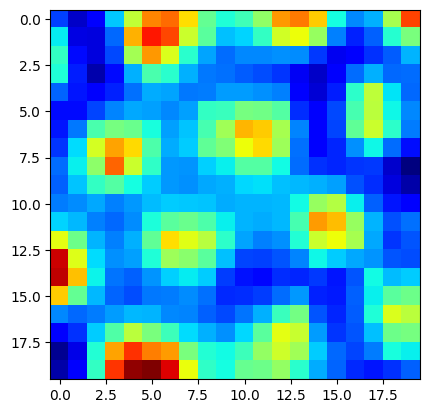

In [36]:
plt.imshow(d_fitting["fitted_params"][1][:400].reshape(20, 20), cmap="jet")